## MNIST Dataset
http://yann.lecun.com/exdb/mnist/
### Is a large dataset of handwritten used for training various image processing systems.
### The MNIST dataset contains 60,000 training images and 10,000 testing images.

![MNIST](https://corochann.com/wp-content/uploads/2017/02/mnist_plot-800x600.png)

## Unzip the files
#### The images and labels are stored inside these files

In [1]:
# Adapted from 
import gzip
with gzip.open('data/t10k-images-idx3-ubyte.gz', 'rb') as f:
    file_content = f.read()
    


In [2]:
file_content[0:10]

b"\x00\x00\x08\x03\x00\x00'\x10\x00\x00"

In [3]:
type(file_content)

bytes

### Reading the file byte by byte
#### Little and big Endian
#### Big Endian - The big  byte of the data is placed at the byte with the lowest address. The rest of the data is placed in order in the next three bytes in memory. 
#### Little Endian - The the small byte or little end of the data is placed at the byte with the lowest address. The rest of the data is placed in order in the next three bytes in memory. 

In [4]:
int.from_bytes(file_content[0:4], byteorder='big')

2051

In [5]:
int.from_bytes(file_content[4:8], byteorder='big')

10000

In [6]:
int.from_bytes(file_content[12:16], byteorder='big')

28

In [7]:
int.from_bytes(file_content[278:279], byteorder='big')

163

## Reading a single image
####  All images are size normalized to fit in a 20x20 pixel box and there are centered in a 28x28 image using the center of mass.

In [8]:
l = file_content[16:800]

In [9]:
type(l)

bytes

In [10]:
import numpy as np

image = ~np.array(list(file_content[16:800])).reshape(28,28).astype(np.uint8)

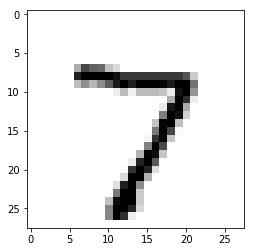

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(image, cmap='gray')

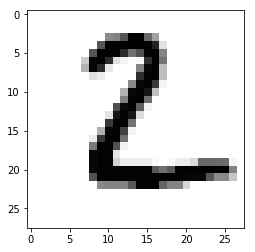

In [12]:
image1 = ~np.array(list(file_content[800:1584])).reshape(28,28).astype(np.uint8)


plt.imshow(image1, cmap='gray')

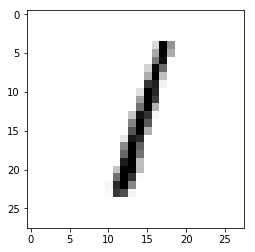

In [13]:
image2 = ~np.array(list(file_content[1584:2368])).reshape(28,28).astype(np.uint8)

plt.imshow(image2, cmap='gray')

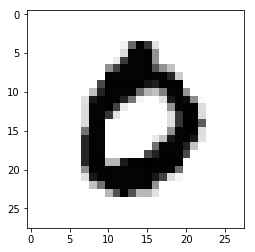

In [14]:
image3 = ~np.array(list(file_content[2368:3152])).reshape(28,28).astype(np.uint8)

plt.imshow(image3, cmap='gray')

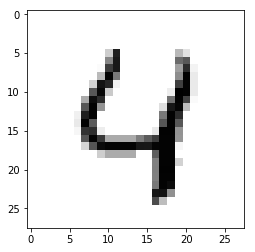

In [15]:
image4 = ~np.array(list(file_content[3152:3936])).reshape(28,28).astype(np.uint8)

plt.imshow(image4, cmap='gray')

## Reading a label

In [16]:
# Adapted from: https://docs.python.org/3/library/gzip.html

import gzip

with gzip.open('data/t10k-labels-idx1-ubyte.gz', 'rb') as f:
    labels = f.read()

In [17]:
int.from_bytes(labels[8:9], byteorder="big")

7

In [18]:
int.from_bytes(labels[9:10], byteorder="big")

2

In [19]:
int.from_bytes(labels[10:11], byteorder="big")

1

In [20]:
int.from_bytes(labels[11:12], byteorder="big")

0

In [21]:
int.from_bytes(labels[12:13], byteorder="big")

4

## Reading an image as a png file

In [22]:
storeArray = {}

In [23]:
# data file
path = "data/"

In [24]:
import os
import shutil
from skimage.io import imsave

In [25]:
# print files in data file
files = os.listdir(path)

print(files)

['t10k-images-idx3-ubyte.gz', 't10k-images.idx3-ubyte', 't10k-labels-idx1-ubyte.gz', 't10k-labels.idx1-ubyte', 'train-images-idx3-ubyte.gz', 'train-images.idx3-ubyte', 'train-labels-idx1-ubyte.gz', 'train-labels.idx1-ubyte']


In [26]:
for file in files:
    #Files in data folders are ubyte files and this will only recognise unbyte files
    if file.endswith ("ubyte"):
        with open (path+file,'rb') as f:
            byte = f.read()
            magicNumber = int.from_bytes(byte[0:4], byteorder='big')
            
            imageSize = int.from_bytes(byte[4:8], byteorder='big')
            
            if(magicNumber == 2051):
                label = 'images'
                rows = int.from_bytes(byte[8:12], byteorder='big')
                
                cols =int.from_bytes(byte[12:16], byteorder='big')
                
                # read 16 bytes after
                imgArray = np.frombuffer(byte,dtype = np.uint8, offset = 16)
                # reshape changed the strcture of the array
                imgArray =imgArray.reshape(imageSize,rows,cols)
            
            #labels 
            elif (magicNumber == 2049):
                label = 'label'
                #read 8 bytes as starts at 8
                labArray = np.frombuffer(byte,dtype = np.uint8,offset = 8)
                # reshape changed the strcture of the array
                # 1000 test images and 60000 training images
                # know the test and train file
                labArray =labArray.reshape(imageSize)
            if (imageSize == 10000):
                imageTest = 'test'
            elif(imageSize == 60000):
                imageTest = 'train'
            
            storeArray[imageTest+label] = imgArray


In [27]:
storeArray.keys()

dict_keys(['testimages', 'testlabel', 'trainimages', 'trainlabel'])

In [28]:
storeArray['testimages'][10,:,:]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  61,   3,
         42, 118, 193, 118, 118,  61,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14, 179, 245, 236,
        242, 254, 254, 254, 254, 245, 235,  84,   0,   0,   0,   0,   0,
          0,   0],
       [  

### Saving the image as png
#### saving the label to the file name
#### using mathplotlib to plot them out and saving as png

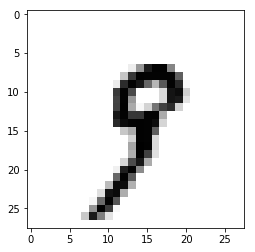

In [29]:
# You can change the range to 10000 for the entire array of test images these are then saved
for x in range(20):
    plt.imshow(~imgArray[x], cmap="gray")
    plt.savefig('images/savedImg-index' + str(x) + '-Label-' + str(labArray[x]))

## Refernces

[Endian](https://chortle.ccsu.edu/AssemblyTutorial/Chapter-15/ass15_3.html),
[Handwritten Digit](https://medium.com/@o.kroeger/tensorflow-mnist-and-your-own-handwritten-digits-4d1cd32bbab4),
[MNist Train and Test](https://colab.research.google.com/github/chokkan/deeplearning/blob/master/notebook/mnist.ipynb),
[GZip Files](https://docs.python.org/3/library/gzip.html),
[MNist Dataset](http://yann.lecun.com/exdb/mnist/),
[MNist with matplot](https://stackoverflow.com/questions/42353676/display-mnist-image-using-matplotlib).